In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import matplotlib.pyplot as plt
import os

from keras.layers import *
from keras.models import Model
import keras

In [2]:
data_dir = './UTKFace'

In [3]:
from PIL import Image
image = Image.open(data_dir+'/1_0_0_20161219140623097.jpg.chip.jpg')
image.show()

데이터 불균형

전체 데이터셋에 대해 언더샘플링과 오버샘플링을 적용

In [4]:
data_dir = './UTKFace'

'''
age_gender_race_date_time.jpg

age: 연령 (0~116)
gender: 성별 (0: 남성, 1: 여성)
race: 인종 (0: 백인, 1: 흑인, 2: 아시아인, 3: 인도인, 4: 기타)
date_time: 이미지 촬영 날짜 및 시간
'''

files = []
ages = []

file_names = os.listdir(data_dir)
for file_name in file_names:
    test = file_name.split('_')
    
    if len(test) == 4:
        age, gender, race, _ = file_name.split('_')
        
        if (int(age) >= 20 and int(age) < 90):
            files.append(file_name)
            ages.append(int(age))


# 데이터 프레임 생성
df = pd.DataFrame({'file_name': files, 'age': ages})
df

,file_name,age
0,40_1_3_20170116191729090.jpg.chip.jpg,40
1,41_0_3_20170119143544485.jpg.chip.jpg,41
2,46_1_0_20170109142329559.jpg.chip.jpg,46
3,49_1_0_20170109220635624.jpg.chip.jpg,49
4,78_0_2_20170112215118168.jpg.chip.jpg,78
...,...,...
18938,69_0_0_20170117172119964.jpg.chip.jpg,69
18939,65_1_3_20170109143047483.jpg.chip.jpg,65
18940,50_0_0_20170116225153572.jpg.chip.jpg,50
18941,28_0_3_20170119194725939.jpg.chip.jpg,28


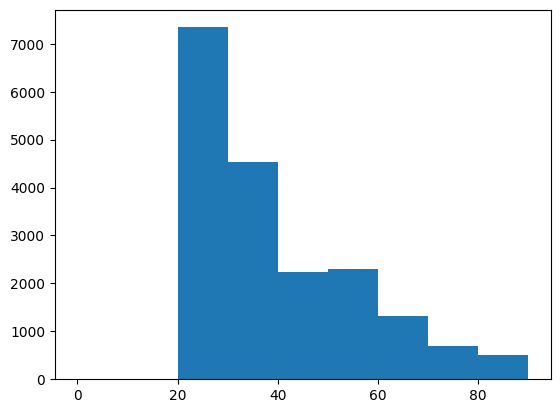

In [5]:
plt.hist(df['age'], bins=range(0, 100, 10))
plt.show()

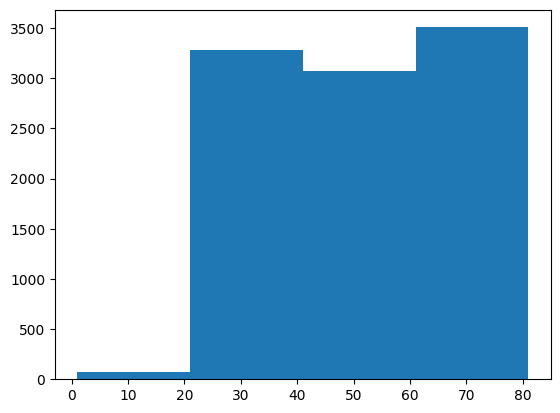

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler

# 이미지 파일이 저장된 경로
data_path = './UTKFace'

# 데이터셋을 읽어들입니다.
data = df

# 각 나이별로 데이터를 분할합니다.
age_groups = [(20, 39), (40, 59), (60, 79), (80, 89)]
age_data = [data[(data['age'] >= group[0]) & (data['age'] <= group[1])] for group in age_groups]

# 각 나이 그룹에서 샘플링할 개수를 정합니다.
target_size = 3000
sample_sizes = [target_size] * len(age_data)


# 언더샘플링을 수행합니다.
sampled_data = []
for group, size in zip(age_data, sample_sizes):
    if len(group) >= size:
        sampled_group = resample(group, replace=False, n_samples=size, random_state=42)
    else:
        sampled_group = group
    sampled_data.append(sampled_group)
new_data = pd.concat(sampled_data)

# 오버샘플링을 수행합니다.
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X, y = new_data.iloc[:, :-1].values, new_data['age'].values
X_resampled, y_resampled = ros.fit_resample(X, y)
new_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['age'])], axis=1)

# 각 나이 그룹에서 3000개씩 샘플링합니다.
sampled_data = []
for group, size in zip(age_data, sample_sizes):
    if len(group) > size:
        sampled_group = resample(group, replace=False, n_samples=size, random_state=42)
    else:
        sampled_group = group.sample(size, replace=True, random_state=42)
    sampled_data.append(sampled_group)
new_data = pd.concat(sampled_data)


# 나이 분포를 시각화합니다.
plt.hist(new_data['age'], bins=range(1, 101, 20))
plt.show()

In [9]:
new_data

,file_name,age
18640,26_1_3_20170117153712926.jpg.chip.jpg,26
8878,35_1_0_20170117092205487.jpg.chip.jpg,35
7495,30_1_2_20170116192643744.jpg.chip.jpg,30
3851,31_1_4_20170112235504601.jpg.chip.jpg,31
3407,36_0_1_20170120221302965.jpg.chip.jpg,36
...,...,...
18557,85_1_2_20170112204748587.jpg.chip.jpg,85
14014,85_1_0_20170110182918046.jpg.chip.jpg,85
2277,80_1_1_20170116153903211.jpg.chip.jpg,80
18416,85_0_0_20170111210559755.jpg.chip.jpg,85


In [13]:
dataset = new_data.copy()

import pandas as pd
import numpy as np

agelist = [
    (dataset['age'] < 40),
    (dataset['age'] >= 40) & (dataset['age'] < 60),
    (dataset['age'] >= 60) & (dataset['age'] < 80),
    (dataset['age'] >= 80)
]

'''
0: 2~30대
1: 4~50대
2: 6~70대
3: 80대 이상
'''
ageRangeList = [0, 1, 2, 3]

dataset['ageRange'] = np.select(agelist, ageRangeList, default='')

dataset['path'] = dataset['file_name'].apply(lambda x: f"{data_dir}/{x}")

dataset = dataset.drop(['file_name', 'age'], axis=1)

In [14]:
dataset

,ageRange,path
18640,0,./UTKFace/26_1_3_20170117153712926.jpg.chip.jpg
8878,0,./UTKFace/35_1_0_20170117092205487.jpg.chip.jpg
7495,0,./UTKFace/30_1_2_20170116192643744.jpg.chip.jpg
3851,0,./UTKFace/31_1_4_20170112235504601.jpg.chip.jpg
3407,0,./UTKFace/36_0_1_20170120221302965.jpg.chip.jpg
...,...,...
18557,3,./UTKFace/85_1_2_20170112204748587.jpg.chip.jpg
14014,3,./UTKFace/85_1_0_20170110182918046.jpg.chip.jpg
2277,3,./UTKFace/80_1_1_20170116153903211.jpg.chip.jpg
18416,3,./UTKFace/85_0_0_20170111210559755.jpg.chip.jpg


In [15]:
dataset.to_pickle("./new_dataset.pkl")

In [16]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

batch_size = 32
epochs = 50
input_shape = (256, 256, 3)

# 이미지 증강 세팅
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)



# 학습 데이터셋 생성
train_generator = train_datagen.flow_from_dataframe(
    train_data,
    x_col='path',
    y_col='ageRange',
    target_size=input_shape[:2],
    batch_size = batch_size,
    class_mode='categorical'
)

# 검증 데이터셋 생성
test_generator = test_datagen.flow_from_dataframe(
    test_data,
    x_col='path',
    y_col='ageRange',
    target_size=input_shape[:2],
    batch_size = batch_size,
    class_mode='categorical'
)

Found 9600 validated image filenames belonging to 4 classes.
Found 2400 validated image filenames belonging to 4 classes.


<h1>학습</h1>

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# tf.keras.layers.Dropout(0.2)

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint

# 모델을 학습합니다.
checkpoint_path = "./best_model.h5"
checkpoint = ModelCheckpoint(checkpoint_path, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

In [24]:
model.load_weights("./best_model.h5")

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs,
    callbacks=[checkpoint]
)

Epoch 1/50
750/750 [==============================] - ETA: 0s - loss: 1.4220 - accuracy: 0.4280
Epoch 00001: val_accuracy did not improve from 0.47667
750/750 [==============================] - 217s 289ms/step - loss: 1.4220 - accuracy: 0.4280 - val_loss: 1.3534 - val_accuracy: 0.4490
Epoch 2/50
750/750 [==============================] - ETA: 0s - loss: 1.4046 - accuracy: 0.4354
Epoch 00002: val_accuracy did not improve from 0.47667
750/750 [==============================] - 216s 288ms/step - loss: 1.4046 - accuracy: 0.4354 - val_loss: 1.3118 - val_accuracy: 0.4673
Epoch 3/50
750/750 [==============================] - ETA: 0s - loss: 1.4037 - accuracy: 0.4362
Epoch 00003: val_accuracy improved from 0.47667 to 0.48517, saving model to ./best_model.h5
750/750 [==============================] - 217s 290ms/step - loss: 1.4037 - accuracy: 0.4362 - val_loss: 1.2920 - val_accuracy: 0.4852
Epoch 4/50
750/750 [==============================] - ETA: 0s - loss: 1.4022 - accuracy: 0.4358
Epoch 000

Epoch 29/50
750/750 [==============================] - ETA: 0s - loss: 1.3282 - accuracy: 0.4705
Epoch 00029: val_accuracy did not improve from 0.51417
750/750 [==============================] - 224s 299ms/step - loss: 1.3282 - accuracy: 0.4705 - val_loss: 1.2520 - val_accuracy: 0.5018
Epoch 30/50
750/750 [==============================] - ETA: 0s - loss: 1.3246 - accuracy: 0.4705
Epoch 00030: val_accuracy did not improve from 0.51417
750/750 [==============================] - 229s 305ms/step - loss: 1.3246 - accuracy: 0.4705 - val_loss: 1.2348 - val_accuracy: 0.5062
Epoch 31/50
750/750 [==============================] - ETA: 0s - loss: 1.3204 - accuracy: 0.4705
Epoch 00031: val_accuracy improved from 0.51417 to 0.51450, saving model to ./best_model.h5
750/750 [==============================] - 220s 293ms/step - loss: 1.3204 - accuracy: 0.4705 - val_loss: 1.2268 - val_accuracy: 0.5145
Epoch 32/50
750/750 [==============================] - ETA: 0s - loss: 1.3166 - accuracy: 0.4762
Epoch

2023-04-26 22:57:34.668957: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (GPU_0_bfc) ran out of memory trying to allocate 576.0KiB (rounded to 589824)requested by op RandomUniform
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-04-26 22:57:34.668985: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for GPU_0_bfc
2023-04-26 22:57:34.668992: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (256): 	Total Chunks: 82, Chunks in use: 82. 20.5KiB allocated for chunks. 20.5KiB in use in bin. 14.6KiB client-requested in use in bin.
2023-04-26 22:57:34.668997: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (512): 	Total Chunks: 76, Chunks in use: 76. 38.0KiB allocated for chunks. 38.0KiB in use in bin. 38.0KiB client-requested in use in bin.
2023-04-26 22:57:34.669002

ResourceExhaustedError: OOM when allocating tensor with shape[3,3,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]